<a href="https://colab.research.google.com/github/DionesGouvea/Michigan/blob/main/Applied%20Machine%20Learning%20in%20Python/Week%203/Assignment_03_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd

## Questão 1

Importe os dados de assets/fraud_data.csv. Qual porcentagem das observações no conjunto de dados são instâncias de fraude?

Esta função deve retornar um float entre 0 e 1.

In [37]:
df = pd.read_csv('/content/fraud_data (1).csv')
def answer_one():
    # YOUR CODE HERE
    return df.Class.mean()

answer_one()

0.016410823768035772

## Questão 2

Usando X_train, X_test, y_train e y_test (conforme definido abaixo), treine um classificador fictício que classifique tudo como a classe majoritária dos dados de treinamento. Qual é a precisão desse classificador? Qual é o recall?

Esta função deve retornar uma tupla com dois floats, ou seja, (pontuação de precisão, pontuação de recall).

In [38]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
def answer_two():
  from sklearn.dummy import DummyClassifier
  from sklearn.metrics import precision_score, recall_score, accuracy_score
  
  # Instanciando o classificador fictício com a estratégia 'most_frequent'
  clf = DummyClassifier(strategy='most_frequent')

  # Treinando o classificador fictício com os dados de treinamento
  clf.fit(X_train, y_train)

  # Fazendo previsões com o classificador fictício
  y_pred = clf.predict(X_test)

  # Calculando a precisão e o recall do classificador fictício
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  return (accuracy, recall)
answer_two()

(0.9852507374631269, 0.0)

## Questão 3

Usando X_train, X_test, y_train, y_test (conforme definido acima), treine um classificador SVC usando os parâmetros padrão. Qual é a exatidão, recall e precisão desse classificador?

Essa função deve retornar uma tupla com três floats, ou seja, (pontuação de accuracy, pontuação de recall, pontuação de precisão).

In [40]:
def answer_three():
    from sklearn.metrics import precision_score, recall_score, accuracy_score
    from sklearn.svm import SVC
    
    clf = SVC()

    # Treinando o classificador com os dados de treinamento
    clf.fit(X_train, y_train)

   
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return (accuracy, recall, precision)

answer_three() 

(0.9900442477876106, 0.35, 0.9333333333333333)

## Questão 4

Usando o classificador SVC com parâmetros {'C': 1e9, 'gamma': 1e-07}, qual é a matriz de confusão ao usar um limite de -220 na função de decisão. Use X_test e y_test.

Esta função deve retornar uma matriz de confusão, um array numpy 2x2 com 4 inteiros.

In [46]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    # Criando um classificador SVC com os parâmetros dados
    clf = SVC(C=1e9, gamma=1e-07)

    # Treinando o classificador com os dados de treinamento
    clf.fit(X_train, y_train)

    # Fazendo previsões nos dados de teste
    y_pred = clf.decision_function(X_test) > -220

    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    return conf_matrix
answer_four()

array([[5320,   24],
       [  14,   66]])

O método decision_function retorna a distância das amostras até a superfície de decisão do classificador. Ao usar um limite de -220, estamos definindo um ponto de corte na distância em que as amostras serão classificadas como positivas ou negativas

## Questão 5

Treine um classificador de regressão logística com parâmetros padrão usando X_train e y_train.

Para o classificador de regressão logística, crie uma curva de precision recall e uma curva roc usando y_test e as estimativas de probabilidade para X_test (probabilidade de fraude).

Olhando para a curva de recall de precisão, qual é o recall quando a precisão é 0,75?

Olhando para a curva roc, qual é a taxa de verdadeiros positivos quando a taxa de falsos positivos é 0,16?

Esta função deve retornar uma tupla com dois floats, ou seja, (recall, taxa de verdadeiro positivo).

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


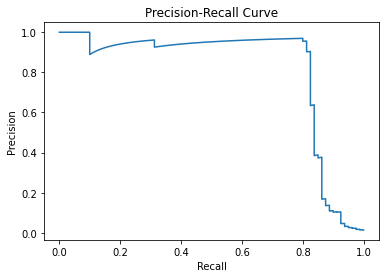

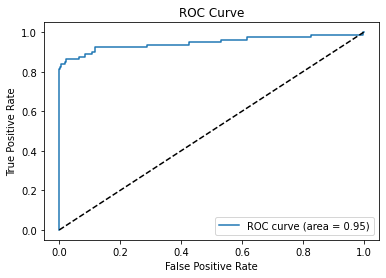

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



**LEMBRETE**
A função predict_proba retorna um array com duas colunas, uma para cada classe possível. A primeira coluna contém as probabilidades estimadas para a classe negativa (classe 0) e a segunda coluna contém as probabilidades estimadas para a classe positiva (classe 1).

No trecho de código y_pred_proba = lr.predict_proba(X_test)[:, 1], o uso dos colchetes [:, 1] é uma forma de selecionar a segunda coluna do array retornado pela função predict_proba. Essa segunda coluna contém as probabilidades estimadas para a classe positiva (classe 1) pelo modelo de regressão logística.

